# 1 Logistic Regression
## 1.1 Visualizing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math
plt.style.use('deeplearning.mplstyle')

In [2]:
dlblue = '#0096ff'

In [3]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam_1', 'Exam_2', 'Admitted'])

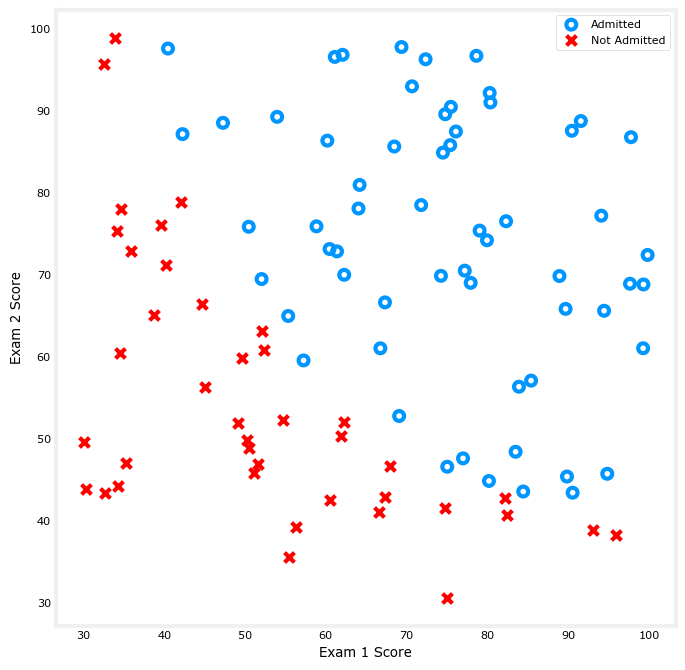

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(positive['Exam_1'], positive['Exam_2'], s=50, marker='o', label='Admitted', facecolors='none'
, edgecolors=dlblue, lw=3)
ax.scatter(negative['Exam_1'], negative['Exam_2'], s=50, marker='x', label='Not Admitted', c='red', lw=3)
# ax.legend()
plt.legend(loc='upper right')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## Implementation
### 1.2.1 Warmup exercise: sigmoid function

In [5]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    return 1 / (1 + np.exp(-z))

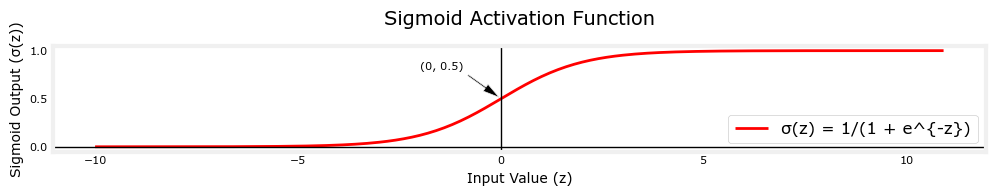

In [6]:
test_nums = np.arange(-10, 11, step=0.1)

fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(test_nums, sigmoid(test_nums), color='red', linewidth=2, label='σ(z) = 1/(1 + e^{-z})')
ax.legend(loc='lower right', fontsize=12, framealpha=0.95)

ax.annotate('(0, 0.5)', xy=(0, 0.5), xytext=(-2, 0.8), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), fontsize=8)

ax.set_xlabel('Input Value (z)', fontsize=10)
ax.set_ylabel('Sigmoid Output (σ(z))', fontsize=10)
ax.set_title('Sigmoid Activation Function', fontsize=14, pad=15)

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

### 1.2.2 Cost function and gradient

In [16]:
def compute_cost_logistic(X, y, w, b):
    m, n = X.shape
    cost = 0.0
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        # 防止log(0)出现
        f_wb_i = np.clip(f_wb_i, 1e-10, 1-1e-10)
        cost += -y[i, 0] * np.log(f_wb_i) - (1 - y[i, 0]) * np.log(1 - f_wb_i)
    cost = cost / m
    
    return cost

In [17]:
rows, cols = data.shape

X = data.iloc[:, 0:cols - 1].values
y = data.iloc[:, cols - 1:cols].values
w_tmp = np.array([0, 0])
b_tmp = 0

In [18]:
cost_tmp = compute_cost_logistic(X, y, w_tmp, b_tmp)
cost_tmp

0.6931471805599458

In [19]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i, 0]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [28]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        if i % math.ceil(num_iters / 100) == 0:
            print(f'Iteration {i:4d}  Cost {J_history[-1]} ')

    return w, b, J_history

In [27]:
# X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y_train = np.array([[0], [0], [0], [1], [1], [1]])
w_tmp  = np.zeros_like(X[0])
b_tmp  = 0.
alph = 0.001
iters = 100000
w_out, b_out, J_out = gradient_descent(X, y, w_tmp, b_tmp, alph, iters)
print(f'w_out: {w_out}, b_out: {b_out}, J_out: {J_out[-1]}') 
# w_out, b_out, J_out

Iteration    0  Cost 0.6982906893667756 
Iteration 1000  Cost 0.6249809656502032 
Iteration 2000  Cost 0.620228852892571 
Iteration 3000  Cost 0.6155580289027095 
Iteration 4000  Cost 0.6109671129225749 
Iteration 5000  Cost 0.6064547313159181 
Iteration 6000  Cost 0.6020195186760546 
Iteration 7000  Cost 0.5976601188684052 
Iteration 8000  Cost 0.5933751860082076 
Iteration 9000  Cost 0.5891633853740796 
Iteration 10000  Cost 0.5850233942583292 
Iteration 11000  Cost 0.5809539027551395 
Iteration 12000  Cost 0.5769536144879258 
Iteration 13000  Cost 0.5730212472773498 
Iteration 14000  Cost 0.5691555337516023 
Iteration 15000  Cost 0.565355221900709 
Iteration 16000  Cost 0.5616190755767071 
Iteration 17000  Cost 0.5579458749416338 
Iteration 18000  Cost 0.554334416865327 
Iteration 19000  Cost 0.5507835152751103 
Iteration 20000  Cost 0.5472920014594443 
Iteration 21000  Cost 0.5438587243276775 
Iteration 22000  Cost 0.5404825506280071 
Iteration 23000  Cost 0.5371623651257985 
Itera